In [1]:
from keras.models import Sequential
from keras.layers import Convolution2D, MaxPooling2D, Flatten, Dense

Using TensorFlow backend.


In [2]:
model = Sequential()

In [3]:
# Add convolutional layer
model.add(Convolution2D(32,(3,3), activation='relu', input_shape=(224,224,3)))

In [4]:
# Add pooling layer
model.add(MaxPooling2D(pool_size=(2,2)))

In [5]:
# Add Flatten layer
model.add(Flatten())

In [6]:
# Add Dense layer
model.add(Dense(kernel_initializer='uniform', activation='relu', units=120)) #120 = no of neurons in a layer

In [7]:
# Add output layer
model.add(Dense(kernel_initializer='uniform', activation='sigmoid', units=1))

In [8]:
# Compile the model
model.compile(optimizer='sgd', loss='binary_crossentropy', metrics=['accuracy'])

In [9]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)

In [10]:
X_train = train_datagen.flow_from_directory('./cat2dog/train/',
                                           target_size=(224,224),
                                           batch_size=32,
                                           class_mode='binary')

X_test = test_datagen.flow_from_directory('./cat2dog/test/',
                                          target_size=(224,224),
                                           batch_size=32,
                                           class_mode='binary')

Found 2035 images belonging to 2 classes.
Found 200 images belonging to 2 classes.


In [11]:
print(X_train.class_indices)
print(X_test.class_indices)

{'cat': 0, 'dog': 1}
{'cat': 0, 'dog': 1}


In [12]:
history = model.fit(x=X_train, validation_data=X_test, epochs=10)

Epoch 1/10
64/64 [==============================] - 34s 536ms/step - loss: 0.4272 - accuracy: 0.8123 - val_loss: 0.2741 - val_accuracy: 0.7000
Epoch 2/10
64/64 [==============================] - 27s 424ms/step - loss: 0.1925 - accuracy: 0.9248 - val_loss: 0.8370 - val_accuracy: 0.9000
Epoch 3/10
64/64 [==============================] - 28s 431ms/step - loss: 0.1696 - accuracy: 0.9499 - val_loss: 0.1009 - val_accuracy: 0.9500
Epoch 4/10
64/64 [==============================] - 26s 409ms/step - loss: 0.1044 - accuracy: 0.9686 - val_loss: 0.0431 - val_accuracy: 0.9900
Epoch 5/10
64/64 [==============================] - 26s 404ms/step - loss: 0.1067 - accuracy: 0.9646 - val_loss: 0.0061 - val_accuracy: 0.9850
Epoch 6/10
64/64 [==============================] - 27s 425ms/step - loss: 0.0987 - accuracy: 0.9661 - val_loss: 0.0116 - val_accuracy: 0.9850
Epoch 7/10
64/64 [==============================] - 27s 415ms/step - loss: 0.0934 - accuracy: 0.9661 - val_loss: 0.0082 - val_accuracy: 0.9850

In [13]:
history.history.keys()

dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])

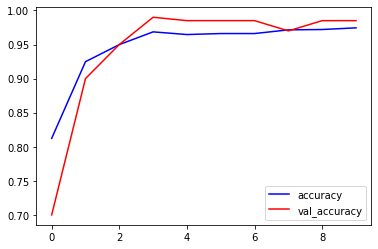

In [14]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'], label='accuracy', c='blue')
plt.plot(history.history['val_accuracy'], label='val_accuracy', c='red')
plt.legend()
plt.show()

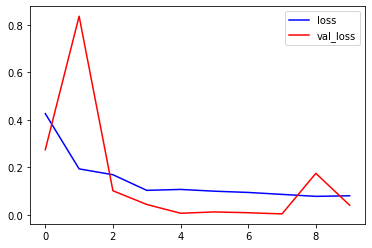

In [15]:
plt.plot(history.history['loss'], label='loss', c='blue')
plt.plot(history.history['val_loss'], label='val_loss', c='red')
plt.legend()
plt.show()

In [16]:
model.save('cnn_model.h5')

In [1]:
from keras.models import load_model
import numpy as np
import cv2

Using TensorFlow backend.


In [2]:
model = load_model('cnn_model.h5')

from skimage.transform import resize

def detect(frame):
    try:
        frame=resize(frame,(224,224))
        img=np.expand_dims(frame, axis=0)
        if(np.max(img)>1):
            img=img/255.0
        prediction_val = model.predict(img)
        print('Prediction Class =',prediction_val[0][0])
        prediction_class = model.predict_classes(img)
        print('cat' if prediction_class[0][0]==0 else 'dog')
        cv2.imshow("Image", frame)
        cv2.waitKey(0)
        return
    except AttrubuteError:
        print('shape not found')

In [3]:
frame=cv2.imread('./cat.jpg')
data = detect(frame)

Prediction Class = 0.00029244152
cat


In [4]:
frame=cv2.imread('./dog.jpg')
data = detect(frame)

Prediction Class = 0.99984205
dog
